# Personal Insurance on Lifestyle
## Content:
Dataset contains customer’s information based on their lifestyle and insurance cost.
Data is collected by an insurance company.

## Format:
* No of Vehicle- How many vehicles owned
* Vacations/Year- Number of vacations in one year
* Vacation Type- Places of vacation(Domestic/International)
* Brand conscious- Is customer brand conscious?
* Hobbies- Main hobby
* Existing Insurance Coverage- Type of current insurance
* Medical History- Did have any medical history
* Living Region-
* Bmi- Body mass index
* Age- Age in complete years
* Gender
* Salary- per month
* Insurance Type- Dependent variable

## Task:

1. Can you accurately predict insurance type?
2. Make cluster analysis for insurance type and age?

**K-means clustering is a popular unsupervised machine learning algorithm used for clustering analysis.**

In the of approach this problem, we are interested in understanding the relationship between 'Insurance Type' and 'Age' and how they can be grouped together. By applying K-means clustering, we can identify distinct clusters in the data based on these variables.

Algorithm steps for clustering:

* Importing the necessary libraries, including the KMeans class from scikit-learn.

* create a DataFrame called cluster_data that includes the 'Insurance Type' and 'Age' columns from the original data.

* initialize a K-means clustering object, kmeans, with a specified number of clusters (in this case, 3) and a random state for reproducibility.

* fit the K-means model to the 'Age' column in cluster_data using kmeans.fit().

* assign cluster labels to each data point in cluster_data using kmeans.labels_.

*  add the cluster labels as a new column, 'Cluster', to cluster_data.

*  plot the clusters using a scatter plot, where 'Age' is on the x-axis and 'Insurance Type' is on the y-axis. Each cluster is represented by a different color.

Import the necessary libraries: **pandas** for data manipulation, **sklearn.cluster.KMeans** for K-means clustering, **matplotlib.pyplot** for plotting, and **seaborn** for enhanced data visualization.

In [21]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


Read the dataset from a CSV file named **"personal_insurance_on_lifestyle.csv"** into a **pandas DataFrame** called data

In [22]:
data = pd.read_csv('personal_insurance_on_lifestyle.csv')

 Separate the features (X) and the target variable (y) from the data DataFrame. The **drop** function is used to remove the column named 'Insurance Type' from X, and it is assigned to the variable y.

In [23]:
X = data.drop('Insurance Type', axis=1)
y = data['Insurance Type']

Performs one-hot encoding on the categorical features in X using the **get_dummies** function from **pandas**. It converts categorical variables into binary columns, making them suitable for machine learning algorithms.

In [24]:
X_encoded = pd.get_dummies(X)

Split the encoded features (X_encoded) and the target variable (y) into training and testing sets using the train_test_split function from scikit-learn. It randomly shuffles and divides the data into 80% for training (X_train and y_train) and 20% for testing (X_test and y_test).

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

Create an instance of the **andomForestClassifierR** class from **scikit-learn**, assigns it to the variable classifier, and trains the classifier on the training data (X_train and y_train) using the fit method.

In [26]:
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

RandomForestClassifier()

This line uses the trained classifier to predict the insurance type for the test set **(X_test)** and assigns the predictions to **y_pred.**

In [27]:
y_pred = classifier.predict(X_test)

Import the accuracy_score function from scikit-learn to calculate the accuracy of the classifier's predictions **(y_pred)** compared to the actual labels **(y_test)**. The accuracy score is then printed.

In [28]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


Creates a new DataFrame called cluster_data with two columns: 'Age' and 'Insurance Type'. It extracts these columns from the original data DataFrame.

In [29]:
cluster_data = pd.DataFrame({
    'Age': data['Age'],
    'Insurance Type': data['Insurance Type']
})


Create an instance of the **KMeans **class with **n_clusters=3,** which specifies the number of clusters desired. The **random_state** parameter sets the seed for random number generation. The fit method then performs K-means clustering on the 'Age' column of** cluster_data**

In [30]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(cluster_data[['Age']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

Add a new column named 'Cluster' to **cluster_data** and assigns the cluster labels obtained from the **K-means** clustering to this column.

In [31]:
cluster_data['Cluster'] = kmeans.labels_


Use **seaborn (sns)** and **matplotlib (plt)** to create a scatter plot. The plot visualizes the relationship between 'Age' and 'Insurance Type' from **cluster_data**. Each point is colored according to its assigned cluster label ('Cluster'). The title function sets the title of the plot, and show displays the plot on the screen.

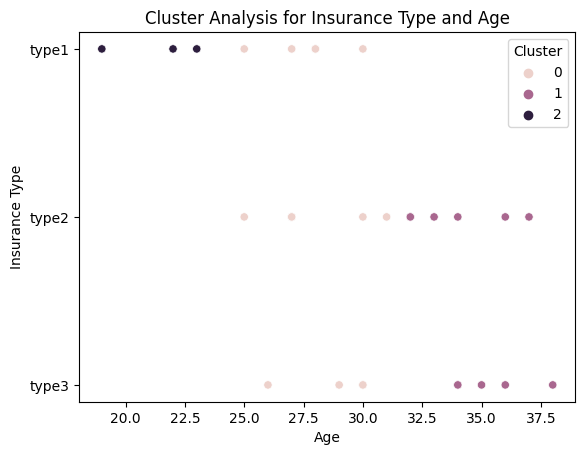

In [32]:
sns.scatterplot(data=cluster_data, x='Age', y='Insurance Type', hue='Cluster')
plt.title('Cluster Analysis for Insurance Type and Age')
plt.show()